# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [4]:
# Read in data
data = Path("../Resources/student_loans.csv")
df = pd.read_csv(data)
df.head()
df.tail()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   payment_history         1599 non-null   float64
 1   location_parameter      1599 non-null   float64
 2   stem_degree_score       1599 non-null   float64
 3   gpa_ranking             1599 non-null   float64
 4   alumni_success          1599 non-null   float64
 5   study_major_code        1599 non-null   float64
 6   time_to_completion      1599 non-null   float64
 7   finance_workshop_score  1599 non-null   float64
 8   cohort_ranking          1599 non-null   float64
 9   total_loan_score        1599 non-null   float64
 10  financial_aid_score     1599 non-null   float64
 11  credit_ranking          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Separate data in X and Y
X = df.iloc[:, 0:11].values
y = df["credit_ranking"].values

In [9]:
# Scale the data
# Create the features (X) and target (y) sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

## Define a model with 1 hidden layer

In [12]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim = number_input_features, activation="relu")
)

# Output layer
nn.add(Dense(units=1, activation="linear"))


c:\Users\pablo\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 40.3524 - mse: 40.3524 - val_loss: 37.3832 - val_mse: 37.3832
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36.0672 - mse: 36.0672 - val_loss: 35.1079 - val_mse: 35.1079
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.8409 - mse: 32.8410 - val_loss: 33.0692 - val_mse: 33.0692
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.9157 - mse: 29.9158 - val_loss: 31.1569 - val_mse: 31.1569
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.4056 - mse: 27.4055 - val_loss: 29.3732 - val_mse: 29.3732
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.3637 - mse: 25.3638 - val_loss: 27.6614 - val_mse: 27.6614
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 23.3230 - mse: 23.3229 - val_loss: 25.9583 - val_mse: 25.9583
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.7897 - mse: 20.7899 - val_loss: 24.2234 - val_mse: 24.2234
Epoch 9/200
35/35 ━━━━━━━━━━━━

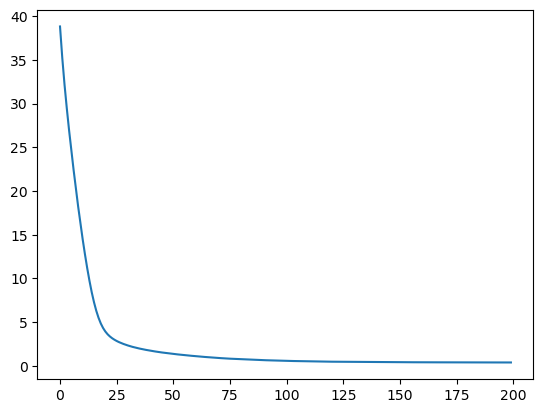

In [16]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])

## Define a model with 2 hidden layers

In [17]:
## Deep Neural Net
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4
number_input_features = 11

nn = Sequential()
# Hidden first layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation="relu")
)

#Hidden Second layers
nn.add(
    Dense(units=hidden_nodes_layer2, activation="relu")
)

# Output layer
nn.add(Dense(units=1, activation="linear"))





c:\Users\pablo\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.1761 - mse: 20.1760 - val_loss: 16.7711 - val_mse: 16.7711
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.3587 - mse: 16.3588 - val_loss: 13.6385 - val_mse: 13.6385
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.6073 - mse: 12.6074 - val_loss: 10.5266 - val_mse: 10.5266
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6446 - mse: 9.6447 - val_loss: 7.7822 - val_mse: 7.7822
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6701 - mse: 6.6702 - val_loss: 5.5879 - val_mse: 5.5879
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1002 - mse: 5.1003 - val_loss: 4.1271 - val_mse: 4.1271
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3199 - mse: 4.3199 - val_loss: 3.3144 - val_mse: 3.3144
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3295 - mse: 3.3295 - val_loss: 2.9880 - val_mse: 2.9880
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

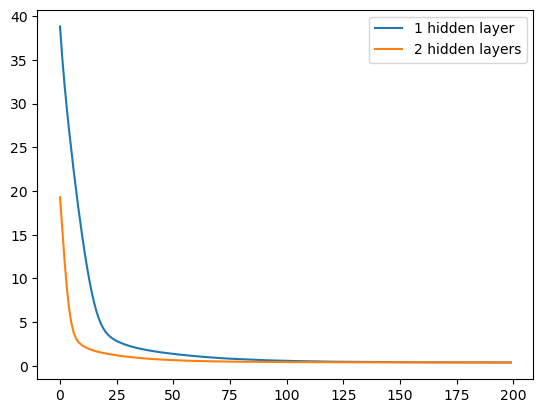

In [19]:
# Overlay results of deep and shallow models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()


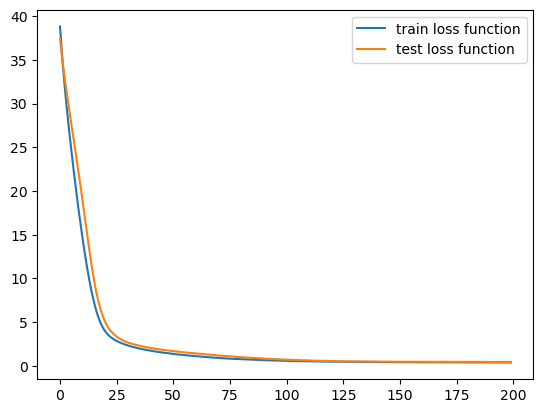

In [20]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.legend(["train loss function", "test loss function"])
plt.show()

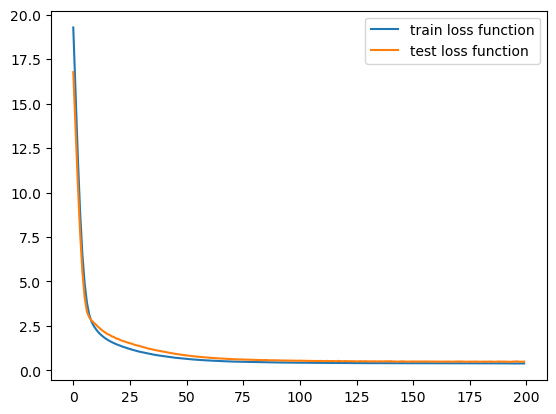

In [21]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.legend(["train loss function", "test loss function"])
plt.show()